El análisis de los datos relacionados con la calidad del vino tiene un impacto significativo en la industria vinícola, ya que permite identificar patrones en las características químicas que determinan la calidad de un producto. Esto no solo optimiza los procesos de producción, sino que también ayuda a mejorar la calidad final para los consumidores. En un mercado competitivo, tener un entendimiento más profundo de cómo factores como el nivel de acidez, el contenido de azúcar, o el pH influyen en la calidad del vino puede proporcionar una ventaja estratégica para los productores.


Este análisis es particularmente relevante para:

Productores de vino: Les permitirá ajustar procesos de fermentación y mezcla para mejorar la calidad de sus productos.

Enólogos y expertos en calidad: Podrán identificar cuáles características químicas deben monitorearse más de cerca para garantizar estándares consistentes de calidad.

Consumidores finales: Aunque indirectamente, se beneficiarán al acceder a productos de mayor calidad.

Investigadores en ciencia de alimentos: Los hallazgos pueden servir como referencia para estudios más avanzados en la interacción de componentes químicos y la calidad percibida de productos.

Mercadólogos y analistas de mercado: Les proporcionará información sobre qué factores destacar en campañas publicitarias para productos premium.

Este proyecto tiene el potencial de transformar datos complejos en información práctica, ayudando a diversas partes interesadas a tomar decisiones más informadas y basadas en evidencia científica.

In [25]:
# Importar librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from imblearn.over_sampling import SMOTE
from collections import Counter
# Scikit
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
# Modelos
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
# Metricas
from sklearn.metrics import accuracy_score, f1_score, classification_report

In [2]:
# Cargar el dataset
from google.colab import files

# Subir archivo desde tu computadora
uploaded = files.upload()

# Cambiar "tu_archivo.csv" por el nombre del archivo que subiste
df = pd.read_csv('winequality-red.csv')


Saving winequality-red.csv to winequality-red.csv


In [3]:
print(df.head())  # Primeras filas

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

In [4]:
# Exploración inicial
print(df.info())  # Información general
print(df.describe())  # Estadísticas descriptivas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.00000

In [5]:
df.shape #mostramos cantidad filas y columnas

(1599, 12)

In [6]:
#Verificamos si hay valores duplicados
df.duplicated().sum()

240

In [7]:
#Verificamos si hay valores ausentes
df.isna().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


Los vinos pueden tener caracteristicas identicas, por lo que se decidió no remover los duplicados para esta primera parte

# Preguntas a responder


¿Qué variables químicas tienen mayor correlación con la calidad del vino?
¿Hay características específicas que predicen una calidad más alta?

¿Cómo se distribuyen los diferentes niveles de calidad en el dataset?
¿Existen vinos con calidad excepcionalmente alta o baja?

¿Los vinos con mayor contenido de alcohol tienden a tener una calidad más alta?

¿Qué podemos aprender de las distribuciones de pH, volatile acidity, o sulphates?

# Visualizaciones

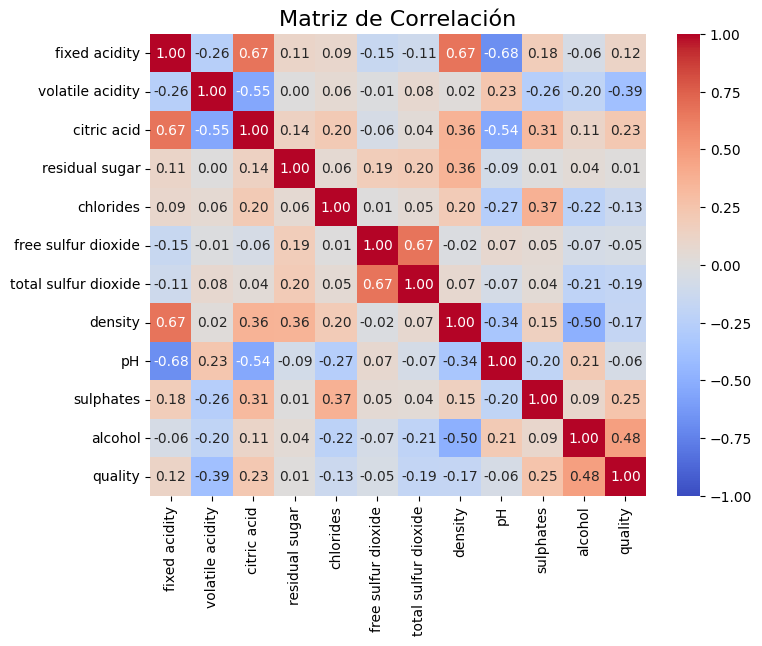

In [8]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlación', fontsize=16)
plt.show()

<ipython-input-9-6d036efb1a1d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='quality', data=df, palette='viridis')


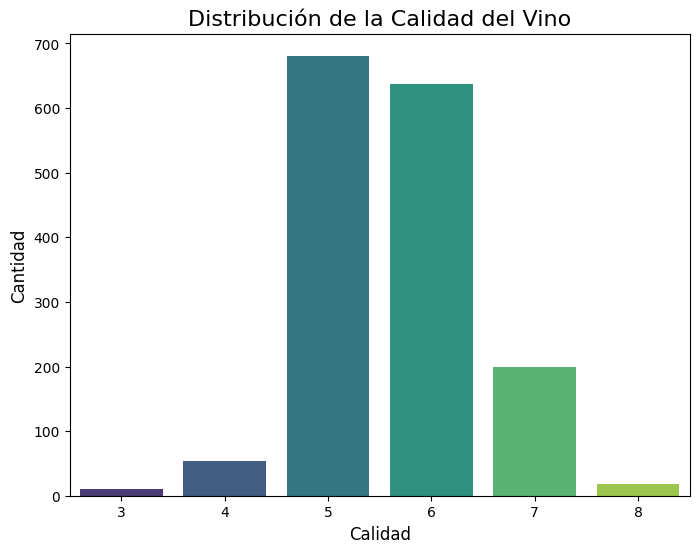

In [9]:
plt.figure(figsize=(8, 6))
sns.countplot(x='quality', data=df, palette='viridis')
plt.title('Distribución de la Calidad del Vino', fontsize=16)
plt.xlabel('Calidad', fontsize=12)
plt.ylabel('Cantidad', fontsize=12)
plt.show()

<ipython-input-10-c7664d9f99ee>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='quality', y='alcohol', data=df, palette='viridis')


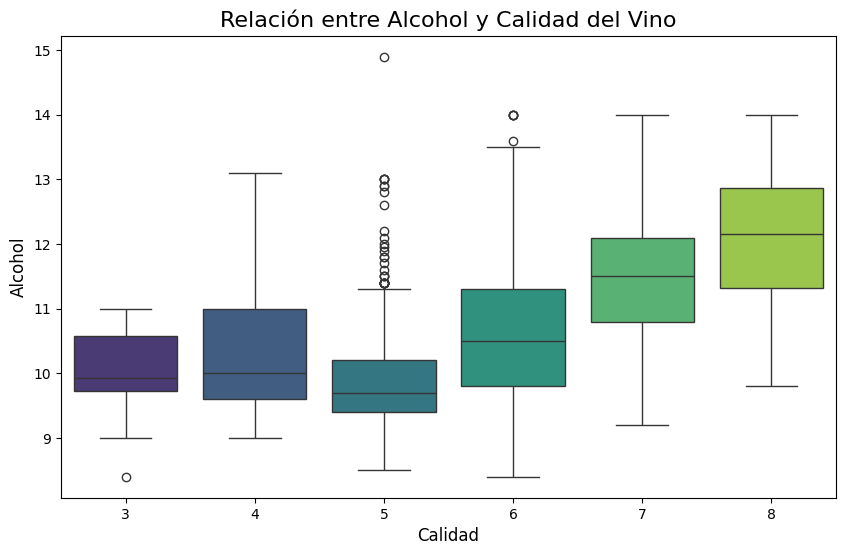

In [10]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='quality', y='alcohol', data=df, palette='viridis')
plt.title('Relación entre Alcohol y Calidad del Vino', fontsize=16)
plt.xlabel('Calidad', fontsize=12)
plt.ylabel('Alcohol', fontsize=12)
plt.show()

<ipython-input-11-2a602cd4536d>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['volatile acidity'], label='Volatile Acidity', shade=True)
<ipython-input-11-2a602cd4536d>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['pH'], label='pH', shade=True)
<ipython-input-11-2a602cd4536d>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['sulphates'], label='Sulphates', shade=True)


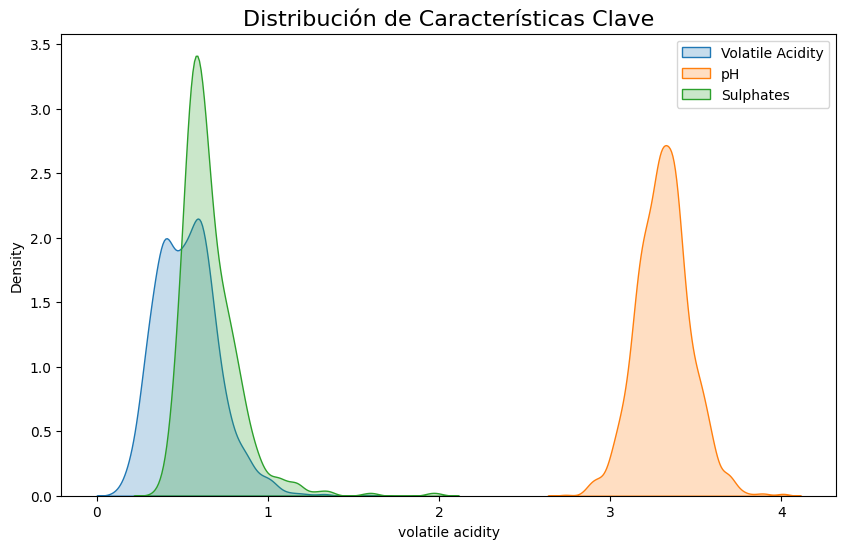

In [11]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df['volatile acidity'], label='Volatile Acidity', shade=True)
sns.kdeplot(df['pH'], label='pH', shade=True)
sns.kdeplot(df['sulphates'], label='Sulphates', shade=True)
plt.title('Distribución de Características Clave', fontsize=16)
plt.legend()
plt.show()

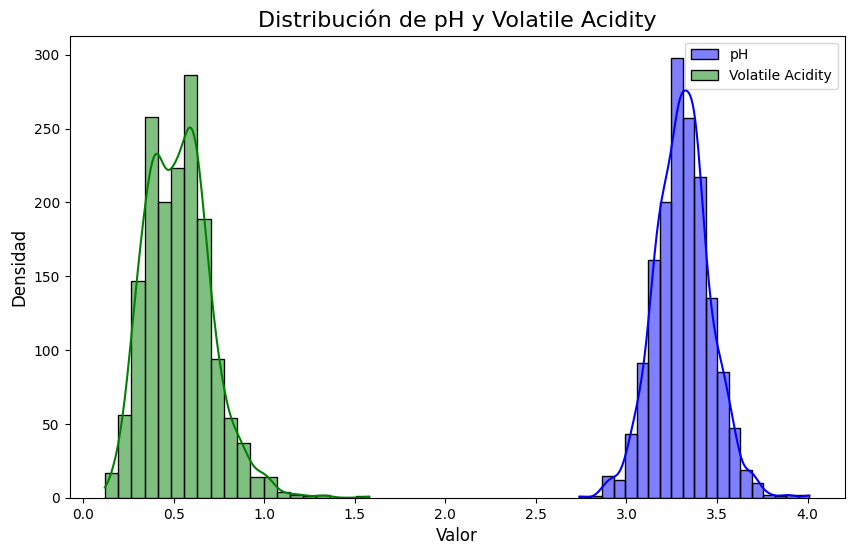

In [12]:
# Distribuciones para pH y volatile acidity
plt.figure(figsize=(10, 6))
sns.histplot(df['pH'], kde=True, color='blue', label='pH', bins=20)
sns.histplot(df['volatile acidity'], kde=True, color='green', label='Volatile Acidity', bins=20)
plt.title('Distribución de pH y Volatile Acidity', fontsize=16)
plt.xlabel('Valor', fontsize=12)
plt.ylabel('Densidad', fontsize=12)
plt.legend()
plt.show()


# Ingeníeria de atributos

In [13]:
# Definir las categorías de calidad con una función y no con get_dummies ya que estamos hablando de una variable ordinal
def categorize_quality(q):
    if q <= 4:
        return 0  # Baja calidad
    elif q <= 6:
        return 1  # Media calidad
    else:
        return 2  # Alta calidad

# Aplicar la función a la columna quality
df['quality_category'] = df['quality'].apply(categorize_quality)

# Verificar la distribución de clases
print(df['quality_category'].value_counts())

# Mostrar los primeros registros
print(df.head())


quality_category
1    1319
2     217
0      63
Name: count, dtype: int64
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  q

In [16]:
# Seleccionar las columnas numéricas para normalizar
features_to_scale = [
    'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
    'chlorides', 'free sulfur dioxide', 'total sulfur dioxide',
    'density', 'pH', 'sulphates', 'alcohol'
]

# Aplicar StandardScaler para estandarización (media = 0, desviación estándar = 1)
scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[features_to_scale] = scaler.fit_transform(df_scaled[features_to_scale])

# Crear nuevas características
df_scaled['total_acidity'] = df_scaled['fixed acidity'] + df_scaled['volatile acidity']
df_scaled['density_alcohol'] = df_scaled['density'] * df_scaled['alcohol']


print(df_scaled.head())


   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0      -0.528360          0.961877    -1.391472       -0.453218  -0.243707   
1      -0.298547          1.967442    -1.391472        0.043416   0.223875   
2      -0.298547          1.297065    -1.186070       -0.169427   0.096353   
3       1.654856         -1.384443     1.484154       -0.453218  -0.264960   
4      -0.528360          0.961877    -1.391472       -0.453218  -0.243707   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0            -0.466193             -0.379133  0.558274  1.288643  -0.579207   
1             0.872638              0.624363  0.028261 -0.719933   0.128950   
2            -0.083669              0.229047  0.134264 -0.331177  -0.048089   
3             0.107592              0.411500  0.664277 -0.979104  -0.461180   
4            -0.466193             -0.379133  0.558274  1.288643  -0.579207   

    alcohol  quality  quality_category  total_acidity  d

# Entrenamiento y Testeo

In [19]:
# Definir variables predictoras y variable objetivo
X = df_scaled.drop(columns=['quality', 'quality_category'])  # Eliminamos quality porque ya categorizamos
y = df_scaled['quality_category']

# Dividir en conjuntos de entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Inicializar y entrenar modelos
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
lgbm_model = LGBMClassifier(random_state=42)

rf_model.fit(X_train, y_train)
lgbm_model.fit(X_train, y_train)

# Predicciones en el conjunto de prueba
y_pred_rf = rf_model.predict(X_test)
y_pred_lgbm = lgbm_model.predict(X_test)

# Evaluar los modelos
print("Random Forest:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"F1-score: {f1_score(y_test, y_pred_rf, average='weighted'):.4f}")
print(classification_report(y_test, y_pred_rf))

print("\n LightGBM:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_lgbm):.4f}")
print(f"F1-score: {f1_score(y_test, y_pred_lgbm, average='weighted'):.4f}")
print(classification_report(y_test, y_pred_lgbm))



[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000330 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1535
[LightGBM] [Info] Number of data points in the train set: 1279, number of used features: 13
[LightGBM] [Info] Start training from score -3.241811
[LightGBM] [Info] Start training from score -0.192538
[LightGBM] [Info] Start training from score -1.994779
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Random Forest:
Accuracy: 0.8781
F1-score: 0.8569
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        13
           1       0.90      0.96      0.93       264
           2       0.73      0.63      0.68        43

    accuracy                           0.88       320
   macro avg       0.54      0.53      0.53       320
weighted avg       0

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Optimización

In [23]:
# Aplicar SMOTE solo al conjunto de entrenamiento
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Verificar la nueva distribución de clases
print("Distribución antes del balanceo:", Counter(y_train))
print("Distribución después de SMOTE:", Counter(y_resampled))



Distribución antes del balanceo: Counter({1: 1055, 2: 174, 0: 50})
Distribución después de SMOTE: Counter({1: 1055, 2: 1055, 0: 1055})


In [26]:
# Definir los hiperparámetros a buscar (ajustado a RandomizedSearch para menos combinaciones)
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'class_weight': ['balanced']
}

# Inicializar el modelo
rf_model = RandomForestClassifier(random_state=42)

# Configurar RandomizedSearchCV (busca 10 combinaciones aleatorias en lugar de todas)
random_search_rf = RandomizedSearchCV(
    rf_model, param_grid_rf, n_iter=10, cv=3, scoring='f1_weighted', n_jobs=-1, verbose=2, random_state=42
)

# Ejecutar búsqueda de mejores hiperparámetros
random_search_rf.fit(X_resampled, y_resampled)

# Mostrar los mejores parámetros
print("Mejores hiperparámetros para RandomForest:", random_search_rf.best_params_)


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Mejores hiperparámetros para RandomForest: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 20, 'class_weight': 'balanced'}


In [28]:
# Definir los hiperparámetros a buscar para LightGBM
param_grid_lgbm = {
    'n_estimators': [100, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [-1, 10],
    'num_leaves': [20, 31],
    'class_weight': ['balanced']
}

# Inicializar el modelo
lgbm_model = LGBMClassifier(random_state=42)

# Configurar RandomizedSearchCV (prueba 10 combinaciones aleatorias)
random_search_lgbm = RandomizedSearchCV(
    lgbm_model, param_grid_lgbm, n_iter=10, cv=3, scoring='f1_weighted', n_jobs=-1, verbose=2, random_state=42
)

# Ejecutar búsqueda de mejores hiperparámetros
random_search_lgbm.fit(X_resampled, y_resampled)

# Mostrar los mejores parámetros
print("Mejores hiperparámetros para LightGBM:", random_search_lgbm.best_params_)


Fitting 3 folds for each of 10 candidates, totalling 30 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000867 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3314
[LightGBM] [Info] Number of data points in the train set: 3165, number of used features: 13
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further sp

# Selección de modelos

In [29]:
# Hacer predicciones con los mejores modelos encontrados
best_rf = random_search_rf.best_estimator_
best_lgbm = random_search_lgbm.best_estimator_

y_pred_rf = best_rf.predict(X_test)
y_pred_lgbm = best_lgbm.predict(X_test)

# Evaluar modelos optimizados
print("\n Reporte Random Forest Optimizado:")
print(classification_report(y_test, y_pred_rf))

print("\n Reporte LightGBM Optimizado:")
print(classification_report(y_test, y_pred_lgbm))




 Reporte Random Forest Optimizado:
              precision    recall  f1-score   support

           0       0.18      0.15      0.17        13
           1       0.92      0.86      0.89       264
           2       0.56      0.81      0.67        43

    accuracy                           0.83       320
   macro avg       0.56      0.61      0.58       320
weighted avg       0.84      0.83      0.83       320


 Reporte LightGBM Optimizado:
              precision    recall  f1-score   support

           0       0.25      0.15      0.19        13
           1       0.93      0.91      0.92       264
           2       0.68      0.84      0.75        43

    accuracy                           0.87       320
   macro avg       0.62      0.63      0.62       320
weighted avg       0.87      0.87      0.87       320



# Insights

1. ¿Qué variables químicas tienen mayor correlación con la calidad del vino?
Según la matriz de correlación, las variables con mayor correlación positiva con la calidad son:
alcohol (0.48): A mayor contenido de alcohol, mayor calidad del vino.
sulphates (0.25): Un contenido adecuado de sulfatos también está relacionado con una calidad superior.
La correlación negativa más significativa es:
volatile acidity (-0.39): Una mayor acidez volátil tiende a estar asociada con una menor calidad.

2. ¿Hay características específicas que predicen una calidad más alta?
Los vinos de calidad más alta (7-8) tienen un contenido de alcohol y sulphates mayor.


3. ¿Cómo se distribuyen los diferentes niveles de calidad en el dataset?
La mayoría de los vinos están clasificados con calidad 5 y 6 (más del 80% del dataset).
Muy pocos vinos tienen calidad 3 (baja) o 8 (alta).

4. ¿Existen vinos con calidad excepcionalmente alta o baja?
Sí:
Calidad excepcionalmente alta: Pocos vinos alcanzan calidad 8.
Calidad baja: Calidad 3 es muy poco frecuente.

6. ¿Los vinos con mayor contenido de alcohol tienden a tener una calidad más alta?
Sí, según la gráfica de boxplot, los vinos con mayor contenido de alcohol tienen una calidad promedio más alta. Los vinos de calidad 7 y 8 tienen un contenido de alcohol significativamente mayor.

7. ¿Qué podemos aprender de las distribuciones de pH, volatile acidity, y sulphates?
pH: Se concentra entre 3.2 y 3.4, lo que indica un rango relativamente consistente en el dataset.
Volatile Acidity: La mayoría de los vinos tienen acidez volátil baja, con valores entre 0.4 y 0.8.
Sulphates: Valores moderados entre 0.5 y 0.8 están asociados con la mayoría de los vinos.

Relaciones significativas con la calidad:

Variables como alcohol, volatile acidity, y sulphates tienen correlaciones más fuertes con la calidad del vino.
density y residual sugar parecen tener menos impacto directo en la calidad.
Desequilibrio en la calidad:

Alcohol y calidad:

Los vinos con mayor contenido de alcohol tienden a clasificarse con calidad más alta.

Distribuciones de características:

El pH y la volatile acidity presentan distribuciones bien definidas que podrían ser útiles en modelos predictivos.

# Conclusiones Finales

Después de realizar un análisis de los datos y entrenar modelos de clasificación para predecir la calidad del vino, se obtuvieron los siguientes hallazgos:

1.- LightGBM fue el mejor modelo en términos de precisión general y balance entre clases.
Accuracy: 87% (vs. 83% en Random Forest).
Mejor rendimiento en la clase 2 (alta calidad) con F1-score = 0.75.

2.- El problema de la clase 0 (baja calidad)

Ambos modelos tuvieron problemas en la predicción de la clase 0 (baja calidad).
LightGBM mostró una ligera mejora en precisión para esta clase (0.25 vs. 0.18 en Random Forest), pero el recall sigue siendo bajo (0.15).
La baja cantidad de datos en esta categoría (support = 13) afectó el aprendizaje del modelo.

3.- La calidad del vino está fuertemente influenciada por el contenido de alcohol y sulfatos.

Se confirmó que las variables con mayor impacto en la calidad del vino son alcohol, sulphates y volatile acidity.
Vinos con mayor contenido de alcohol tienden a recibir una calificación más alta.

# Recomendaciones

1.- Recolección de más datos sobre vinos de baja calidad

El desbalance de clases es un problema importante.
Se recomienda obtener más muestras de vinos con calidad 3 y 4 para mejorar el entrenamiento del modelo.

2.- Explorar modelos adicionales y técnicas de ensemble

Probar modelos como XGBoost .
Ajustar hiperparámetros con una búsqueda más refinada en GridSearchCV.
